<a href="https://colab.research.google.com/github/monkrus/img-classification-cnn/blob/main/ImageClassificationCNN5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow import keras
from keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing.image import ImageDataGenerator

In [2]:
#load the CIFAR10 dataset
cifar10 = keras.datasets.cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()


170498071/170498071 [==============================] - 6s 0us/step


In [3]:
#preprocess the data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

y_train = keras.utils.to_categorical(y_train, 10)
y_test = keras.utils.to_categorical(y_test, 10)


In [4]:
# Perform data augmentation
datagen = ImageDataGenerator(
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    horizontal_flip=True,
    vertical_flip=False
)
datagen.fit(x_train)

In [5]:
#build CNN model
model = keras.Sequential([
    Conv2D(32, 3, activation='relu', padding='same', input_shape=(32, 32, 3)),
    BatchNormalization(),
    Dropout(0.2),
    Conv2D(32, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Conv2D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.3),
    Conv2D(64, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Conv2D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    Dropout(0.4),
    Conv2D(128, 3, activation='relu', padding='same'),
    BatchNormalization(),
    MaxPooling2D(2),
    Flatten(),
    Dense(256, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(128, kernel_regularizer=keras.regularizers.l2(0.001), activation='relu'),
    Dropout(0.5),
    BatchNormalization(),
    Dense(10, activation='softmax')
])




In [6]:
# Define learning rate schedule
lr_schedule = ReduceLROnPlateau(monitor='val_accuracy',
                                factor=0.1,
                                patience=5,
                                min_lr=0.0001)


In [7]:
# compile  the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])


In [8]:
#train the model
model.fit(x_train, y_train, epochs=30, validation_split=0.2, callbacks=[lr_schedule])


Epoch 1/30
1250/1250 [==============================] - 31s 12ms/step - loss: 2.3352 - accuracy: 0.3433 - val_loss: 1.8202 - val_accuracy: 0.4698 - lr: 0.0010
Epoch 2/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.6940 - accuracy: 0.5056 - val_loss: 1.5556 - val_accuracy: 0.5377 - lr: 0.0010
Epoch 3/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.4593 - accuracy: 0.5784 - val_loss: 1.3126 - val_accuracy: 0.6352 - lr: 0.0010
Epoch 4/30
1250/1250 [==============================] - 13s 11ms/step - loss: 1.3488 - accuracy: 0.6332 - val_loss: 1.1639 - val_accuracy: 0.6867 - lr: 0.0010
Epoch 5/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.2694 - accuracy: 0.6646 - val_loss: 1.0721 - val_accuracy: 0.7261 - lr: 0.0010
Epoch 6/30
1250/1250 [==============================] - 13s 10ms/step - loss: 1.2346 - accuracy: 0.6890 - val_loss: 1.0823 - val_accuracy: 0.7412 - lr: 0.0010
Epoch 7/30
1250/1250 [========================

In [9]:
# evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)

print('Test accuracy:', test_acc)
print('Test loss:', test_loss)

313/313 [==============================] - 1s 4ms/step - loss: 0.5660 - accuracy: 0.8572
Test accuracy: 0.857200026512146
Test loss: 0.5659857392311096


1/1 [==============================] - 0s 389ms/step


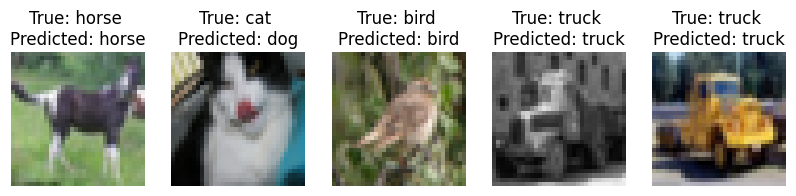

In [11]:
# Visualize some sample predictions
num_samples = 5
sample_indices = np.random.randint(0, len(x_test), num_samples)
sample_images = x_test[sample_indices]
sample_labels = y_test[sample_indices]

predictions = model.predict(sample_images)
predicted_labels = np.argmax(predictions, axis=1)

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10, 5))
for i in range(num_samples):
    plt.subplot(1, num_samples, i + 1)
    plt.imshow(sample_images[i])
    plt.title(f'True: {class_names[np.argmax(sample_labels[i])]} \nPredicted: {class_names[predicted_labels[i]]}')
    plt.axis('off')
plt.show()
